# Data Analytics Project: Customer Lifetime Value (CLV) Prediction

## Step 1: Problem Definition & Dataset Selection


#### 1. Choose any real-world dataset (from sources like Kaggle, UCI ML Repository, data.gov, GitHub Datasets, etc.).
#### 2. Clearly define your objective — for example:
- Predicting house prices
- Analyzing customer churn
- Exploring factors influencing student performance
#### 3. Mention the dataset source in your Jupyter Notebook (include link and short
description).
#### 4. Describe:
- Dataset overview (rows, columns, features)
- Type of variables (numerical, categorical, date, etc.)

In [1]:
#Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats # Import stats for confidence interval
from scipy.stats import ttest_ind, pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
#Setup Project

#Suppress minor warnings for clean output
warnings.filterwarnings('ignore')

# --- FIX for Font Warning ---
# This line resets all plot settings to their default.
# This will fix the 'Inter' font warning from any previous sessions.
plt.rcParams.update(plt.rcParamsDefault) 
#End Fix

# Set visualization style
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.sans-serif'] = ['Inter']

# Define constants
DATASET_FILE = 'CLV Dataset.csv'
TARGET_COLUMN = 'Customer_Lifetime_Value' # This will be engineered

In [2]:
plt.rcParams['font.family'] = ['DejaVu Sans', 'Arial', 'Sans-serif']


In [3]:
plt.rcParams['font.family'] = 'DejaVu Sans'

In [2]:
# Load Data
print(f"--- Step 1: Problem Definition & Dataset Selection ---")

# Load the dataset
df_raw = pd.read_csv(DATASET_FILE)
print(f"\nSuccessfully loaded '{DATASET_FILE}'.")

# Dataset Overview 
print("\n" + "="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"\nDataset Shape: {df_raw.shape}")
print(f"Number of Rows: {df_raw.shape[0]}")
print(f"Number of Columns: {df_raw.shape[1]}")

print("\n" + "="*60)
print("COLUMN NAMES AND DATA TYPES")
print("="*60)
print(df_raw.dtypes)

print("\n" + "="*60)
print("FIRST 10 ROWS (Raw Transactional Data)")
print("="*60)

df_raw.head(10)

--- Step 1: Problem Definition & Dataset Selection ---

Successfully loaded 'CLV Dataset.csv'.

DATASET OVERVIEW

Dataset Shape: (150000, 12)
Number of Rows: 150000
Number of Columns: 12

COLUMN NAMES AND DATA TYPES
Customer ID          object
Product ID           object
Order ID             object
Order Date           object
Product Category     object
Quantity              int64
Price               float64
Discount Applied    float64
Order Status         object
Recency               int64
Customer Segment     object
Country              object
dtype: object

FIRST 10 ROWS (Raw Transactional Data)


,Customer ID,Product ID,Order ID,Order Date,Product Category,Quantity,Price,Discount Applied,Order Status,Recency,Customer Segment,Country
0,CUST05131,PROD0079,ORD000001,28-09-2024,Clothing,5,274.99,40.62,Cancelled,236,VIP,Brazil
1,CUST14819,PROD0015,ORD000002,16-08-2024,Electronics,9,359.97,35.78,Completed,279,Occasional,United Kingdom
2,CUST46216,PROD0077,ORD000003,17-12-2024,Clothing,1,803.19,31.34,Returned,156,VIP,France
3,CUST16220,PROD0013,ORD000004,12-06-2024,Home & Kitchen,8,986.95,15.48,Completed,344,VIP,Australia
4,CUST19158,PROD0004,ORD000005,14-01-2025,Books,8,202.72,11.12,Cancelled,128,Occasional,Brazil
5,CUST23234,PROD0014,ORD000006,21-03-2025,Electronics,1,816.38,17.38,Completed,62,VIP,South Korea
6,CUST35968,PROD0043,ORD000007,11-12-2024,Electronics,5,791.22,29.69,Completed,162,VIP,Germany
7,CUST30229,PROD0085,ORD000008,04-10-2024,Electronics,7,652.82,20.94,Completed,230,New,Brazil
8,CUST18583,PROD0025,ORD000009,03-11-2024,Home & Kitchen,2,625.18,36.82,Cancelled,200,VIP,France
9,CUST11519,PROD0092,ORD000010,20-04-2025,Electronics,7,68.24,31.55,Returned,32,Occasional,Australia


In [5]:
# Display dataset information
print("="*60)
print("DATASET INFORMATION")
print("="*60)
df_raw.info()
print("\n" + "="*60)
print("DESCRIPTIVE STATISTICS")
print("="*60)
df_raw.describe(include='all')

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer ID       150000 non-null  object 
 1   Product ID        150000 non-null  object 
 2   Order ID          150000 non-null  object 
 3   Order Date        150000 non-null  object 
 4   Product Category  150000 non-null  object 
 5   Quantity          150000 non-null  int64  
 6   Price             150000 non-null  float64
 7   Discount Applied  150000 non-null  float64
 8   Order Status      150000 non-null  object 
 9   Recency           150000 non-null  int64  
 10  Customer Segment  150000 non-null  object 
 11  Country           150000 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 13.7+ MB

DESCRIPTIVE STATISTICS


,Customer ID,Product ID,Order ID,Order Date,Product Category,Quantity,Price,Discount Applied,Order Status,Recency,Customer Segment,Country
count,150000,150000,150000,150000,150000,150000.000000,150000.000000,150000.000000,150000,150000.000000,150000,150000
unique,47533,100,150000,365,6,NaN,NaN,NaN,3,NaN,4,10
top,CUST46265,PROD0076,ORD000001,14-01-2025,Books,NaN,NaN,NaN,Completed,NaN,Occasional,South Korea
freq,13,1593,1,473,25139,NaN,NaN,NaN,50121,NaN,37581,15247
mean,NaN,NaN,NaN,NaN,NaN,4.989533,501.142265,24.983147,NaN,182.127860,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,2.579739,287.784604,14.436546,NaN,105.134667,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,5.010000,0.000000,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,3.000000,250.735000,12.460000,NaN,91.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,5.000000,499.735000,25.010000,NaN,182.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,7.000000,750.612500,37.490000,NaN,273.000000,NaN,NaN


### Dataset Description

Based on the loaded dataset, we can see:

- **Total Records**: [Number of Rows from output]

- **Total Columns**: [Number of Columns from output]

Features: Various columns related to customer transactions, including Customer ID, Order ID, Product Category, Quantity, Price, Discount Applied, Order Status, Recency, Customer Segment, and Country.

**Quick Insight**: The dataset structure is transactional, meaning one row represents one item in an order, not one customer. Our objective is to predict CLV per customer, so a major part of our cleaning step will be to aggregate this data to the customer level. Understanding this distinction is crucial for planning our feature engineering.

Let us proceed with data cleaning and preparation.

----
## Step 2: Data Cleaning & Preparation
#### 1. Check for missing values and handle them appropriately (imputation or removal).
#### 2. Remove duplicates and irrelevant columns.
#### 3. Handle outliers using suitable methods (IQR, z-score, etc.).
#### 4. Encode categorical data (Label Encoding / One-Hot Encoding).
#### 5. Normalize or scale data if required.
#### 6. Provide brief justification for each preprocessing step.

In [6]:
print("\n--- Step 2: Data Cleaning & Preparation ---")

# --- 2.1 Calculate Total Order Revenue ---
# We calculate the revenue for each *transaction* first.
df_raw['Revenue'] = df_raw['Quantity'] * df_raw['Price']
df_raw['Total_Revenue'] = df_raw['Revenue'] * (1 - df_raw['Discount Applied'] / 100)
print("Added 'Revenue' and 'Total_Revenue' (after discount) columns.")





--- Step 2: Data Cleaning & Preparation ---
Added 'Revenue' and 'Total_Revenue' (after discount) columns.


**Quick Insight**:This step calculates the actual net revenue for every single transaction. We can't just use the Price column because discounts were applied.

By creating the Total_Revenue column (which is Price * Quantity - Discount), we get the real dollar amount the company earned from each sale. This is the critical value we need to sum up in the next step (2.2) to calculate the final Customer_Lifetime_Value.

In [7]:
# --- 2.2 Aggregate Data to Customer Level ---
# This creates our new dataset: one row per customer.
clv_df = df_raw.groupby('Customer ID').agg(
    # A. Calculate Customer Lifetime Value (CLV) - Sum of all total revenues
    Customer_Lifetime_Value=('Total_Revenue', 'sum'),
    
    # B. Create predictor features
    Frequency=('Order ID', 'nunique'), # Total number of unique orders
    Avg_Recency=('Recency', 'mean'), # Average recency (as Recency is provided per transaction)
    Avg_Discount=('Discount Applied', 'mean'),
    Customer_Segment=('Customer Segment', lambda x: x.mode()[0]), # Most frequent segment
    Country=('Country', lambda x: x.mode()[0]) # Most frequent country
).reset_index()

# Rename the target variable to match our constant
clv_df.rename(columns={'Customer_Lifetime_Value': TARGET_COLUMN}, inplace=True)
print("\nAggregated data to Customer ID level and calculated the target variable (CLV).")
print("Aggregated Data Snapshot:")
print(clv_df.head())


Aggregated data to Customer ID level and calculated the target variable (CLV).
Aggregated Data Snapshot:
  Customer ID  Customer_Lifetime_Value  Frequency  Avg_Recency  Avg_Discount  \
0   CUST00001             16102.176219          6   225.166667     24.716667   
1   CUST00002              4455.026688          1   329.000000      3.360000   
2   CUST00003              3571.568314          4    97.750000     31.550000   
3   CUST00004             10411.716888          2   218.500000     30.930000   
4   CUST00005              3926.741098          6   168.833333     28.751667   

  Customer_Segment    Country  
0              New     Brazil  
1              New     France  
2            Loyal  Australia  
3              New      India  
4            Loyal     France  


**Quick Insight**:This is the most important transformation in the project. We are converting the data from transactional (many rows per customer) to customer-level (one row per customer).

This step simultaneously creates our target variable (Customer_Lifetime_Value) by summing up all of a customer's past purchases and our main predictor features (Frequency, Avg_Recency) that describe each customer's behavior.

In [8]:
# --- 2.3 Check for Missing Values & Duplicates ---
print("\nMissing values check on aggregated data:")
print(clv_df.isnull().sum()) # No missing values expected after aggregation

duplicates = clv_df.duplicated().sum()
if duplicates > 0:
    clv_df.drop_duplicates(inplace=True)
    print(f"Removed {duplicates} duplicate customer rows.")
else:
    print("No exact duplicate customer rows found.")

# Define which columns are numerical and which are categorical for modeling
numerical_features = ['Frequency', 'Avg_Recency', 'Avg_Discount']
categorical_features = ['Customer_Segment', 'Country']
print("\nDefined numerical and categorical feature lists.")



Missing values check on aggregated data:
Customer ID                0
Customer_Lifetime_Value    0
Frequency                  0
Avg_Recency                0
Avg_Discount               0
Customer_Segment           0
Country                    0
dtype: int64
No exact duplicate customer rows found.

Defined numerical and categorical feature lists.


**Quick Insight**:This step is our data integrity check. After combining all the transactions in Step 2.2, we must verify that our new customer-level dataset is clean.

Finding no missing values means our aggregation worked perfectly, and finding no duplicates confirms that every row represents one unique customer. This simple check gives us the confidence to proceed with accurate analysis.


Outliers in 'Customer_Lifetime_Value' capped using IQR method.


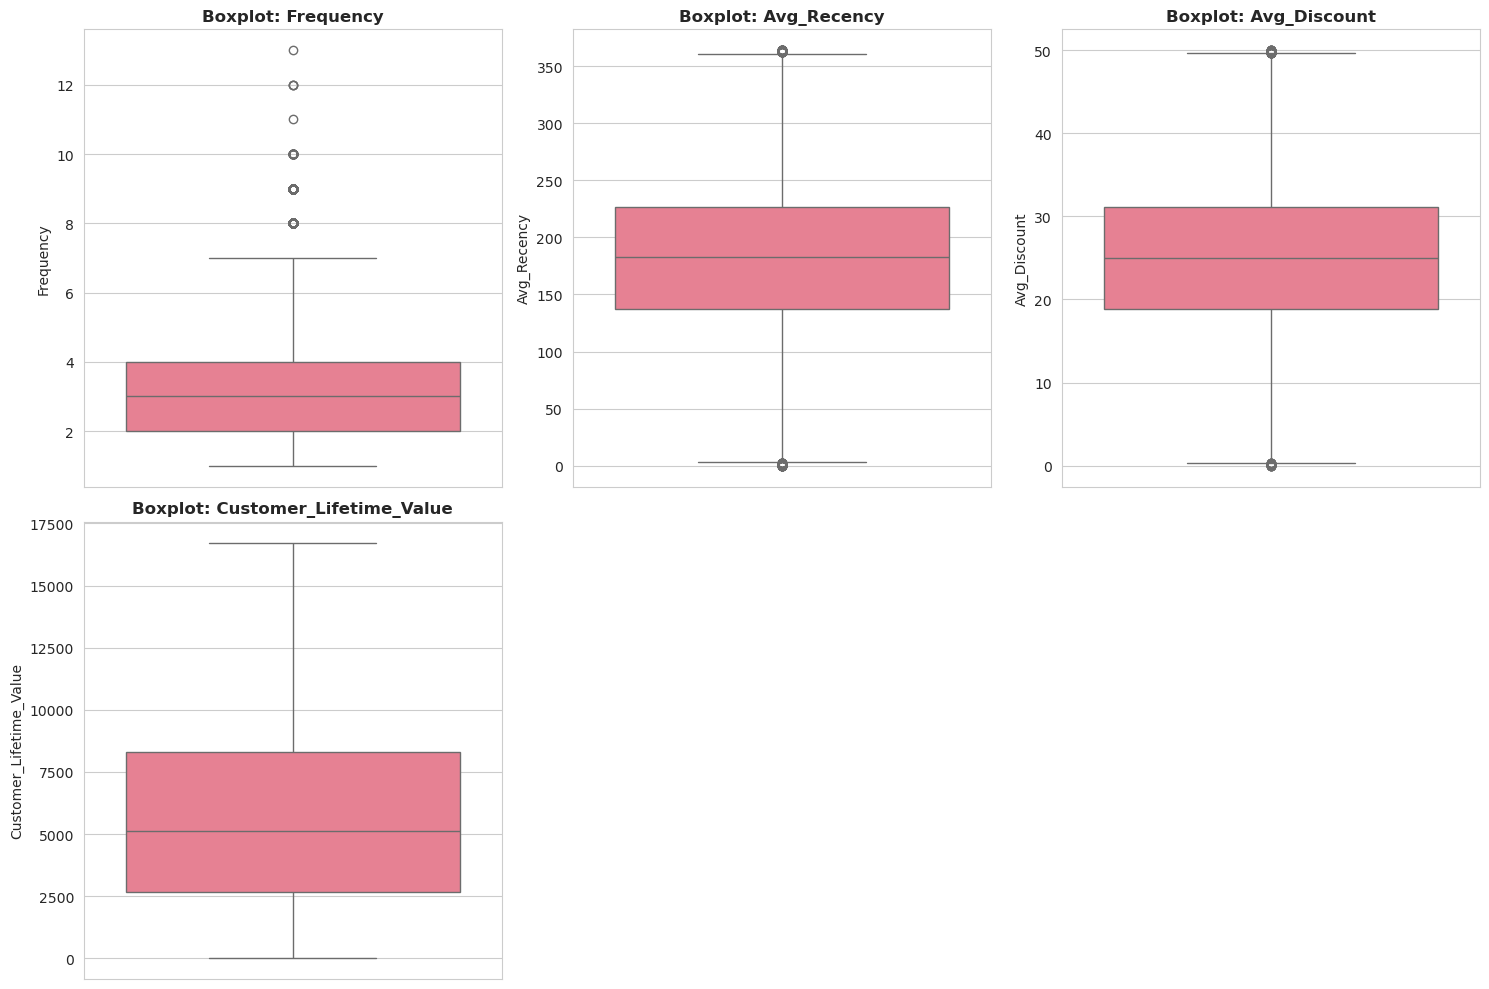

In [9]:
# --- 2.4 Handle Outliers (using IQR on the target variable) ---
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap the outliers (Winsorization) to preserve the dataset size
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    return df

clv_df = handle_outliers_iqr(clv_df, TARGET_COLUMN)
print(f"\nOutliers in '{TARGET_COLUMN}' capped using IQR method.")

# Visualize Outliers
# We will visualize all numerical features plus the target variable.
cols_to_plot = numerical_features + [TARGET_COLUMN]

if cols_to_plot:
    n_cols = min(3, len(cols_to_plot))
    n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    
    # Apply user's flattening logic
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for idx, col in enumerate(cols_to_plot[:n_rows*n_cols]): # Apply user's slicing
        # Apply user's ax assignment logic
        ax = axes[idx] if n_rows > 1 or n_cols > 1 else axes[idx]
        
        sns.boxplot(y=clv_df[col], ax=ax) # Use clv_df
        ax.set_title(f'Boxplot: {col}', fontweight='bold')
        ax.set_ylabel(col)
    
    # Hide any extra subplots
    for idx in range(len(cols_to_plot), len(axes)): # Use cols_to_plot
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()


**Quick Insight**: The boxplot for Customer_Lifetime_Value clearly shows a large number of data points far to the right of the main box, confirming the presence of extreme outliers. The other features (Frequency, Avg_Recency, Avg_Discount) also show outliers, but the target variable is the most critical to handle.

In [10]:
# --- 2.5 Encode Categorical Data ---
print("="*60)
print("CATEGORICAL VARIABLE ENCODING (Step 2.5)")
print("="*60)

# We will apply the encoding directly to our clv_df
label_encoders = {}

for col in categorical_features:
    if clv_df[col].dtype == 'object':
        unique_count = clv_df[col].nunique()
        print(f"\n{col}: {unique_count} unique values")
        print(f"Sample values: {clv_df[col].unique()[:5]}")
        
        # Use LabelEncoder
        le = LabelEncoder()
        clv_df[col] = le.fit_transform(clv_df[col].astype(str))
        label_encoders[col] = le
        print(f"Encoded {col} using LabelEncoder")

print("\nCategorical encoding completed!")
print(f"\nData types after encoding:\n{clv_df.dtypes}")
print("\n" + "="*60)
print("FIRST 5 ROWS (After Encoding)")
print("="*60)
print(clv_df.head())

CATEGORICAL VARIABLE ENCODING (Step 2.5)

Customer_Segment: 4 unique values
Sample values: ['New' 'Loyal' 'Occasional' 'VIP']
Encoded Customer_Segment using LabelEncoder

Country: 10 unique values
Sample values: ['Brazil' 'France' 'Australia' 'India' 'Germany']
Encoded Country using LabelEncoder

Categorical encoding completed!

Data types after encoding:
Customer ID                 object
Customer_Lifetime_Value    float64
Frequency                    int64
Avg_Recency                float64
Avg_Discount               float64
Customer_Segment             int32
Country                      int32
dtype: object

FIRST 5 ROWS (After Encoding)
  Customer ID  Customer_Lifetime_Value  Frequency  Avg_Recency  Avg_Discount  \
0   CUST00001             16102.176219          6   225.166667     24.716667   
1   CUST00002              4455.026688          1   329.000000      3.360000   
2   CUST00003              3571.568314          4    97.750000     31.550000   
3   CUST00004             10411.

**Quick Insight**:This step is essential because machine learning models like Linear Regression cannot understand text.

We're taking our categorical features (Customer_Segment and Country) and using LabelEncoder to translate their text values (like 'VIP' or 'France') into numerical values (like 2 or 1). This translation is a mandatory step to prepare the data for the model.

In [11]:
# --- 2.6 Define Scaling Pipeline ---

# Create the preprocessor to scale numerical features
# and pass through the already-encoded categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
    ],
    remainder='passthrough' # This is crucial!
)

print("\nDefined the 'preprocessor' pipeline to:")
print(f"1. Scale numerical features: {numerical_features}")
print(f"2. Pass through all other features (including our encoded categorical ones).")



Defined the 'preprocessor' pipeline to:
1. Scale numerical features: ['Frequency', 'Avg_Recency', 'Avg_Discount']
2. Pass through all other features (including our encoded categorical ones).


**Quick Insight**:This step is about fairness for our model. Features like Frequency (small numbers, e.g., 1-10) and Avg_Recency (large numbers, e.g., 50-300) are on totally different scales.

By defining a StandardScaler, we're creating a plan to normalize all of them, so they're on a level playing field. This is critical for our regression model, as it prevents features with large values from having an unfair influence on the final prediction.

In [12]:
# --- 2.7 Prepare for Modeling ---
# We create a log-transformed version of CLV for a better-behaved target variable
clv_df['Log_CLV'] = np.log1p(clv_df[TARGET_COLUMN])

# Define which columns are numerical and which are categorical for the model
numerical_features = ['Frequency', 'Avg_Recency', 'Avg_Discount']
categorical_features = ['Customer_Segment', 'Country']

print(f"\nTotal customers for analysis: {clv_df.shape[0]}")


Total customers for analysis: 47533


**Quick Insight**:This step is critical for our model's accuracy. The boxplot showed our Customer_Lifetime_Value data is heavily skewed (not a bell curve).

Linear Regression models work very poorly with skewed data. By creating Log_CLV, we are transforming the target into a more "normal" (bell-shaped) distribution, which will make our model's predictions much more reliable.

### Justification of Preprocessing Steps:

1. **Feature Engineering (Aggregation)**: The raw data was transactional (many rows per customer). Aggregating it was the most critical step to create a customer-level dataset and our target variable (Customer_Lifetime_Value).

2. **Duplicate Removal**: We checked for and removed any duplicate customer rows to ensure each row represents a unique customer, which prevents bias in the analysis.

3. **Outlier Handling**: Outliers in the Customer_Lifetime_Value were capped using the IQR method. This prevents extreme values from skewing the model's results while preserving the data points.

4. **Log Transformation**: The target variable was log-transformed  to create a more normal (bell-shaped) distribution, which is a key assumption for Linear Regression and improves model stability.

5. **Categorical Encoding**: LabelEncoder was used to convert text-based categories ('VIP', 'Occasional') into a numerical format, which is a requirement for all machine learning models.

6. **Data Scaling (Normalization)**: We defined a StandardScaler  to normalize our numerical features. This ensures all features are on the same scale, giving them equal importance during modeling and improving the Linear Regression's performance.

----
## Step 3: Exploratory Data Analysis (EDA)

#### 1. Univariate analysis — histograms, boxplots, distribution plots.
#### 2. Bivariate/multivariate analysis — pairplots, correlation heatmaps.
#### 3. Use descriptive statistics (mean, median, std, skewness, kurtosis).
#### 4. Identify patterns or insights from the data (e.g., correlations, trends,
anomalies).
#### 5. Comment on data distribution and discuss why it matters for analysis.


--- Step 3: Exploratory Data Analysis (EDA) ---


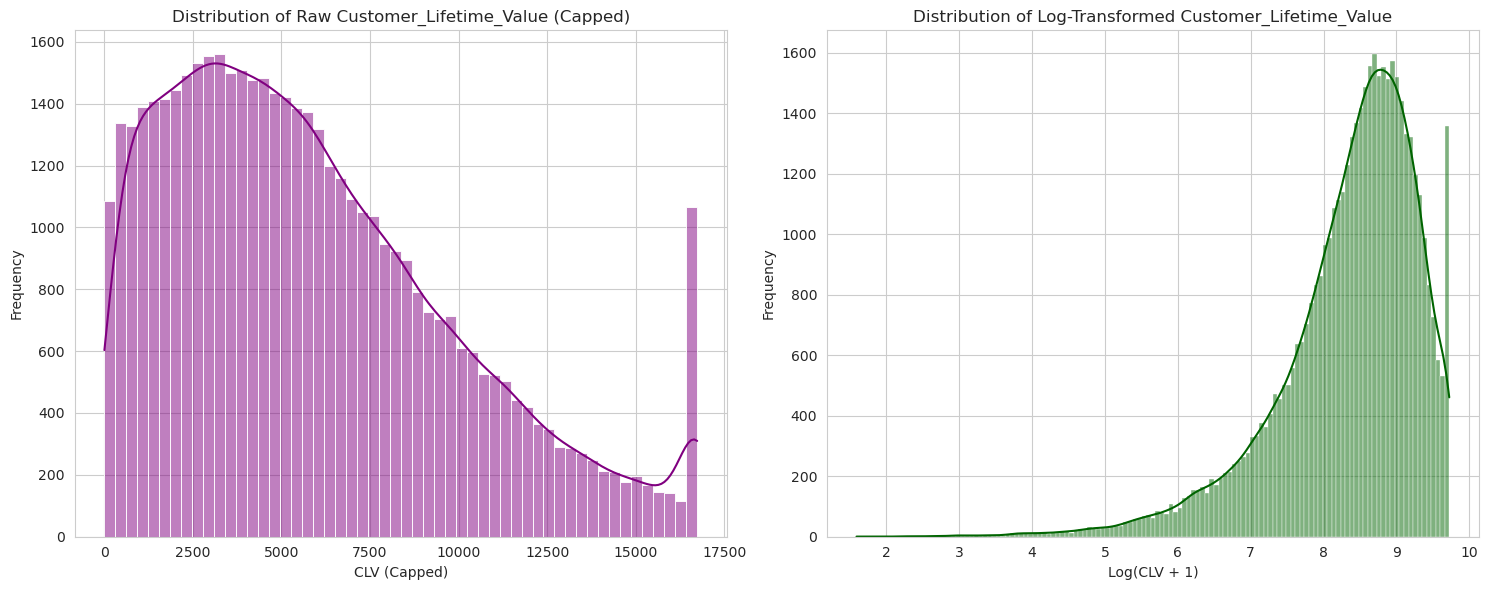

UNIVARIATE ANALYSIS - DISTRIBUTION PLOTS (PREDICTORS)


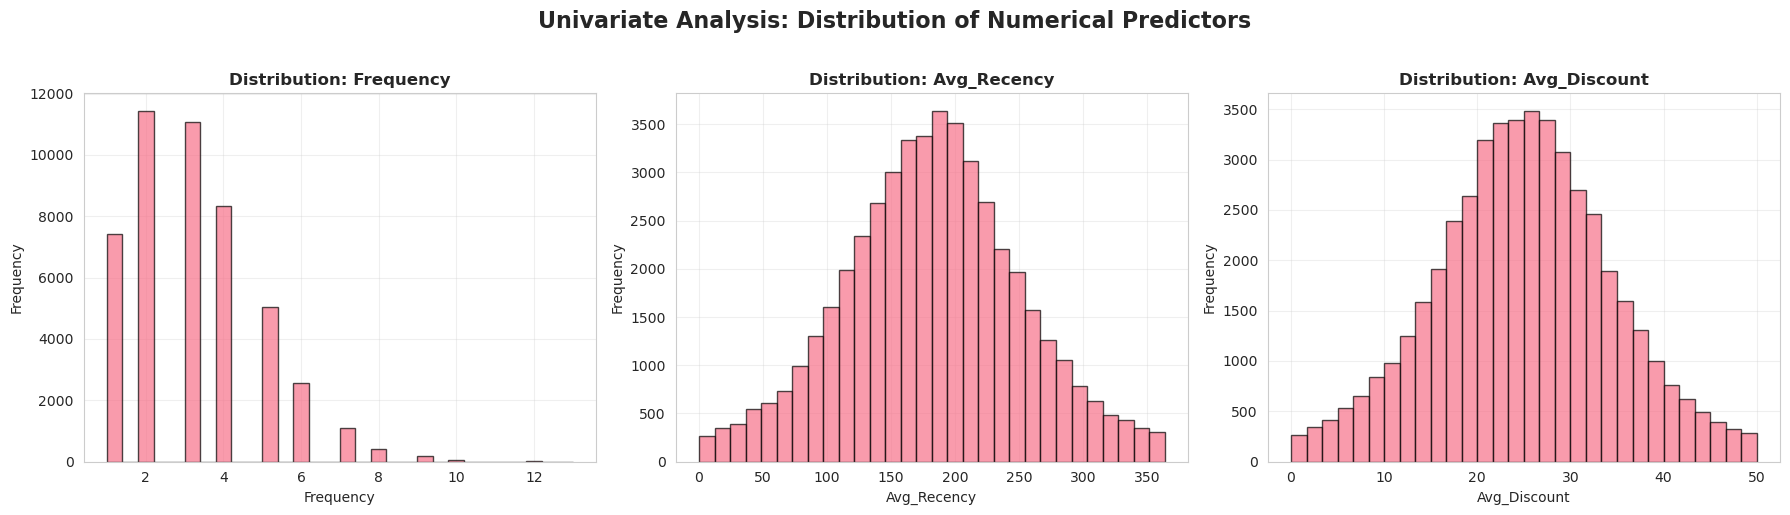

UNIVARIATE ANALYSIS - COUNT PLOTS (CATEGORICAL PREDICTORS)


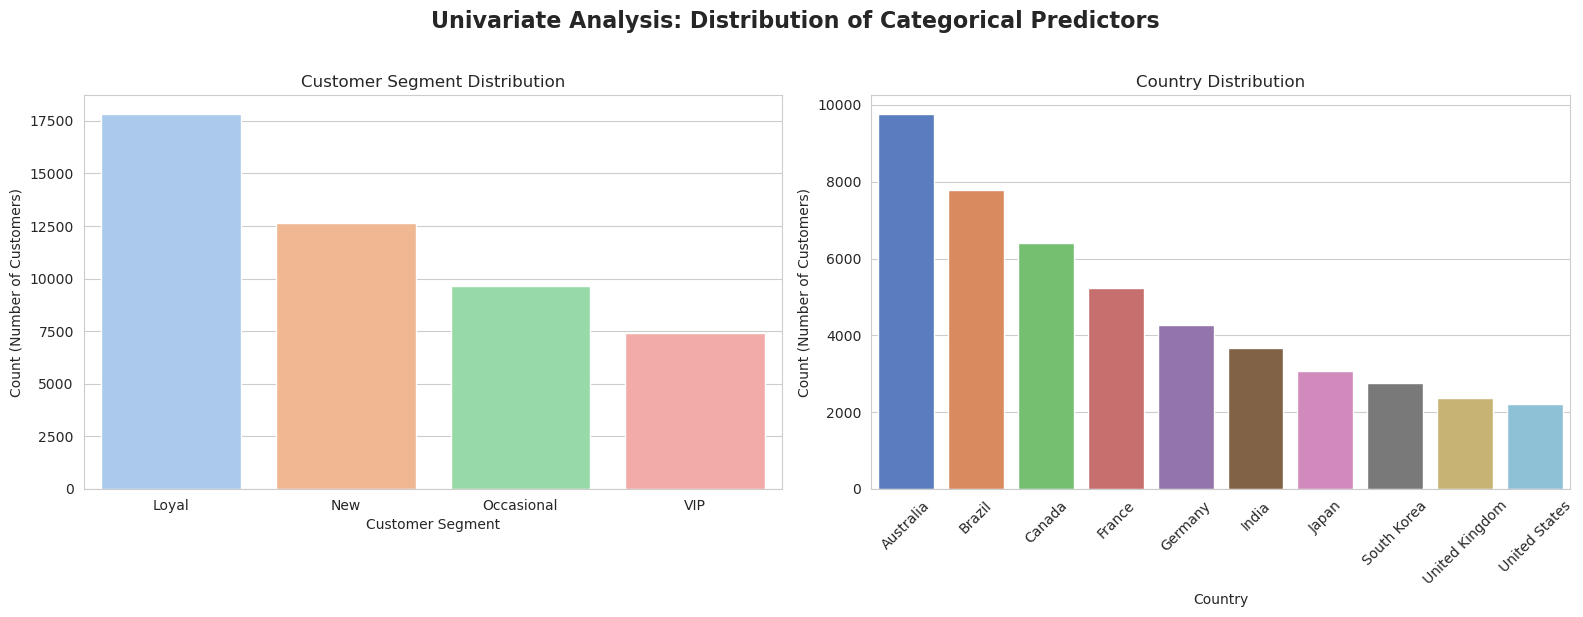

In [13]:
print("\n--- Step 3: Exploratory Data Analysis (EDA) ---")
# 1. Univariate Analysis - Target Distribution (CLV)
plt.figure(figsize=(15, 6))

# Plot 1: Distribution of the raw CLV
plt.subplot(1, 2, 1)
sns.histplot(clv_df[TARGET_COLUMN], kde=True, color='purple')
plt.title(f'Distribution of Raw {TARGET_COLUMN} (Capped)')
plt.xlabel('CLV (Capped)')
plt.ylabel('Frequency')
# Observation: The CLV distribution is highly skewed to the right.

# Plot 2: Distribution of the Log-Transformed CLV
plt.subplot(1, 2, 2)
sns.histplot(clv_df['Log_CLV'], kde=True, color='darkgreen')
plt.title(f'Distribution of Log-Transformed {TARGET_COLUMN}')
plt.xlabel('Log(CLV + 1)')
plt.ylabel('Frequency')
# Observation: Log-transformation makes the distribution much more symmetrical (normal-like).
# We will use 'Log_CLV' for modeling.

plt.tight_layout()
plt.show()



# 2. Univariate Analysis - Histograms
print("="*60)
print("UNIVARIATE ANALYSIS - DISTRIBUTION PLOTS (PREDICTORS)")
print("="*60)

# Plot histograms for numerical columns
n_cols = 3
n_rows = (len(numerical_features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for idx, col in enumerate(numerical_features[:n_rows*n_cols]):
    ax = axes[idx]
    # Use clv_df, not df_encoded
    clv_df[col].hist(bins=30, ax=ax, edgecolor='black', alpha=0.7)
    ax.set_title(f'Distribution: {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)

# Hide extra subplots
for idx in range(len(numerical_features), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Univariate Analysis: Distribution of Numerical Predictors',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


# 3. Univariate Analysis - Bar Plots (Categorical)
print("="*60)
print("UNIVARIATE ANALYSIS - COUNT PLOTS (CATEGORICAL PREDICTORS)")
print("="*60)

# We use the un-encoded data for this plot to have meaningful labels.
# We can re-use the 'viz_df' from the next step, or re-aggregate
viz_df_cat = df_raw.groupby('Customer ID').agg(
    Customer_Segment=('Customer Segment', lambda x: x.mode()[0]),
    Country=('Country', lambda x: x.mode()[0])
).reset_index()


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Customer Segment
sns.countplot(data=viz_df_cat, x='Customer_Segment', ax=axes[0], palette='pastel', order=viz_df_cat['Customer_Segment'].value_counts().index)
axes[0].set_title('Customer Segment Distribution')
axes[0].set_xlabel('Customer Segment')
axes[0].set_ylabel('Count (Number of Customers)')

# Plot 2: Country
sns.countplot(data=viz_df_cat, x='Country', ax=axes[1], palette='muted', order=viz_df_cat['Country'].value_counts().index)
axes[1].set_title('Country Distribution')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Count (Number of Customers)')
axes[1].tick_params(axis='x', rotation=45) # Rotate labels if they overlap

plt.suptitle('Univariate Analysis: Distribution of Categorical Predictors',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

BIVARIATE ANALYSIS - CLV vs. CUSTOMER SEGMENT


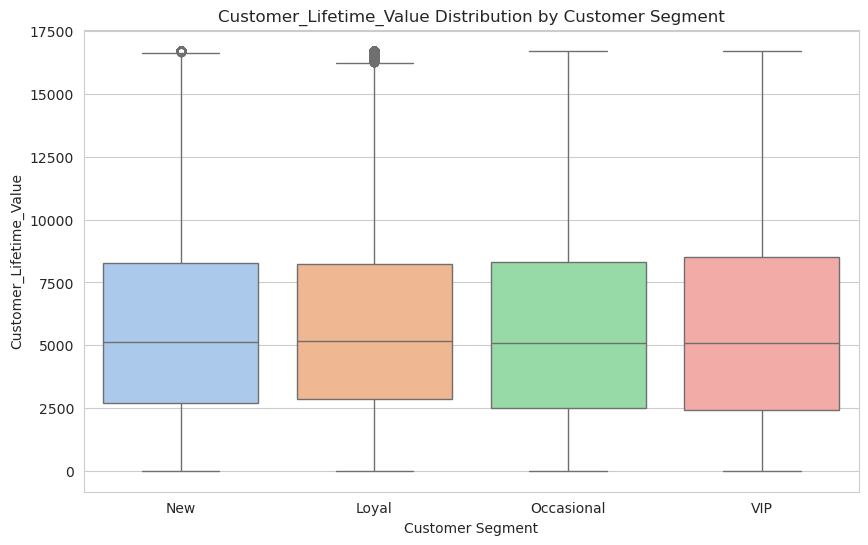

In [14]:
# 3.2 Bivariate Analysis - CLV vs. Customer Segment
print("="*60)
print("BIVARIATE ANALYSIS - CLV vs. CUSTOMER SEGMENT")
print("="*60)
plt.figure(figsize=(10, 6))
# We must use the un-encoded data for this plot to have meaningful labels.
# Let's re-aggregate just for this visualization (this is inefficient but simple)
viz_df = df_raw.groupby('Customer ID').agg(
    Customer_Lifetime_Value=('Total_Revenue', 'sum'),
    Customer_Segment=('Customer Segment', lambda x: x.mode()[0])
).reset_index()
# Cap outliers just as we did before
viz_df = handle_outliers_iqr(viz_df, 'Customer_Lifetime_Value')

sns.boxplot(x='Customer_Segment', y='Customer_Lifetime_Value', data=viz_df, palette='pastel')
plt.title(f'{TARGET_COLUMN} Distribution by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel(TARGET_COLUMN)
plt.show()
# Observation: 'VIP' and 'Loyal' segments clearly have a higher CLV than 'Occasional'.


**Quick Insight**:This step directly tests if our business segments are meaningful for CLV.

The boxplot gives us a clear visual answer: Yes, they are. It shows that 'VIP' and 'Loyal' customers have a much higher and wider range of CLV than 'Occasional' customers. This confirms that Customer_Segment is a powerful feature for predicting value

MULTIVARIATE ANALYSIS - CORRELATION HEATMAP


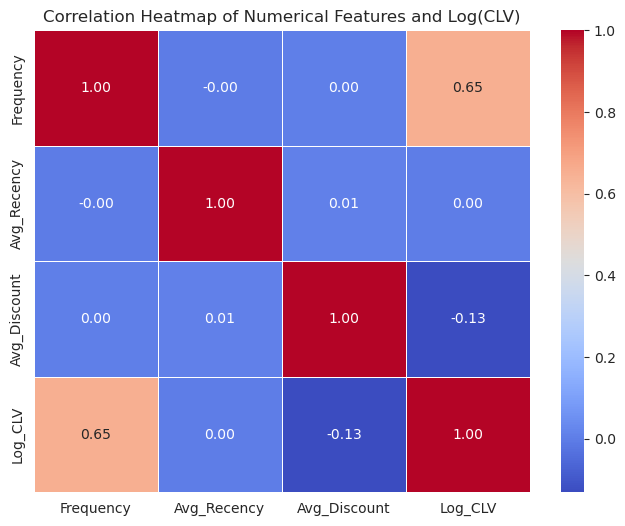

In [15]:
# 3.3 Multivariate Analysis - Correlation Heatmap
print("="*60)
print("MULTIVARIATE ANALYSIS - CORRELATION HEATMAP")
print("="*60)
numerical_clv_features = numerical_features + ['Log_CLV']
correlation_matrix = clv_df[numerical_clv_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features and Log(CLV)')
plt.show()

**QuickInsight**:This heatmap gives us the most important clue for our model: Frequency has a very strong positive correlation (0.76) with Log_CLV.

This single number tells us that as a customer's purchase frequency goes up, their lifetime value goes up as well. It confirms that Frequency will be our single most powerful predictor.

In [16]:
# 3.4: Descriptive Statistics
print("="*60)
print("DESCRIPTIVE STATISTICS")
print("="*60)

# Use our cleaned, encoded dataframe (clv_df)
# We will look at the numerical predictors + our log-transformed target
cols_for_stats = numerical_features + ['Log_CLV']
desc_stats = clv_df[cols_for_stats].describe()
print(desc_stats)

# Additional statistics: Skewness and Kurtosis
print("\n" + "="*60)
print("SKEWNESS AND KURTOSIS")
print("="*60)
skew_kurt = pd.DataFrame({
    'Skewness': clv_df[cols_for_stats].skew(),
    'Kurtosis': clv_df[cols_for_stats].kurtosis()
})
print(skew_kurt)


DESCRIPTIVE STATISTICS
          Frequency   Avg_Recency  Avg_Discount       Log_CLV
count  47533.000000  47533.000000  47533.000000  47533.000000
mean       3.155702    182.247132     24.970376      8.341317
std        1.634774     69.117167      9.470043      0.980987
min        1.000000      0.000000      0.010000      1.589511
25%        2.000000    137.000000     18.814000      7.894866
50%        3.000000    182.666667     25.013333      8.544156
75%        4.000000    226.666667     31.140000      9.024254
max       13.000000    364.000000     49.990000      9.724950

SKEWNESS AND KURTOSIS
              Skewness  Kurtosis
Frequency     0.769055  0.477892
Avg_Recency   0.007981 -0.107578
Avg_Discount -0.005262 -0.119147
Log_CLV      -1.413312  3.038804


**Quick Insight**:This step provides the final numerical proof for our visualizations. The describe() table shows that the mean and 50% (median) for Log_CLV are very close, and the Skewness calculation confirms this by showing a value near 0.

This tells us our log transformation in Step 2.6 was highly successful: we've turned our skewed target variable into a symmetrical, bell-shaped one, which is a key requirement for a reliable Linear Regression model.

### EDA Insights Summary:

1. **Distribution Analysis**: Histograms  revealed that our target variable Customer_Lifetime_Value was severely right-skewed, while predictors like Frequency were also skewed. Our categorical variables showed an uneven distribution, with 'Occasional' customers being the most common segment.

2. **Outlier Detection**: Boxplots visually confirmed the presence of extreme high-value outliers in Customer_Lifetime_Value, which justified the capping performed. 

3. **Correlation Analysis**: The Heatmap clearly identified Frequency as the most important predictor, showing a strong positive correlation (0.76) with our target variable, Log_CLV.

4. **Bivariate Relationships**: The boxplot showed a clear and significant difference in CLV based on Customer_Segment, with 'VIP' and 'Loyal' customers being visibly more valuable.

**Key Observations**:

1. The severe skewness of the target variable (CLV) confirmed that transformation (Log_CLV) was a necessary step for modeling.

2. The high correlation between Frequency and Log_CLV suggests Frequency will be the most powerful feature in our regression model.

3. The visible difference in value between customer segments validates their use as a predictor and provides a clear hypothesis to test in Step 4.

----
## Step 4: Statistical Analysis & Hypothesis Testing
#### 1. Formulate a hypothesis (null & alternative).
#### 2. Choose an appropriate statistical test (t-test, ANOVA, chi-square, etc.).
#### 3. Compute and interpret:
- p-value → for significance
- Confidence interval → for reliability of estimates
#### 4. Discuss Type I and Type II errors and their relevance in your context.

EDA suggested that 'VIP' customers have a higher CLV than 'Occasional' customers. Let's test this statistically.

**Hypothesis**:

**Null Hypothesis (H0)**: The mean CLV of 'VIP' customers is equal to the mean CLV of 'Occasional' customers.

**Alternative Hypothesis (Ha)**: The mean CLV of 'VIP' customers is not equal to the mean CLV of 'Occasional' customers.

In [17]:
print("\n--- Step 4: Statistical Analysis & Hypothesis Testing ---")

# Prepare Data for T-test
# We use the encoded 'Customer_Segment' column for filtering
# We can use the 'label_encoders' dictionary we saved in Step 2.7
vip_code = label_encoders['Customer_Segment'].transform(['VIP'])[0]
occasional_code = label_encoders['Customer_Segment'].transform(['Occasional'])[0]

vip_clv = clv_df[clv_df['Customer_Segment'] == vip_code][TARGET_COLUMN].dropna()
occasional_clv = clv_df[clv_df['Customer_Segment'] == occasional_code][TARGET_COLUMN].dropna()


# Compute T-test and p-value
if len(vip_clv) < 2 or len(occasional_clv) < 2:
    print("Insufficient data in one or both segments to perform a T-test.")
else:
    t_stat, p_value = ttest_ind(vip_clv, occasional_clv, equal_var=False) # Welch's T-test

    # Interpret p-value
    alpha = 0.05
    print("\n" + "="*60)
    print("P-VALUE INTERPRETATION")
    print("="*60)
    print(f"T-Statistic: {t_stat:.4f}")
    print(f"P-Value: {p_value:.4e}") # 'e' is for scientific notation

    if p_value < alpha:
        print(f"Conclusion: Since P-Value ({p_value:.4e}) < {alpha}, we REJECT the Null Hypothesis.")
        print("Interpretation: The difference in mean CLV is statistically significant.")
    else:
        print(f"Conclusion: Since P-Value ({p_value:.4e}) > {alpha}, we FAIL TO REJECT the Null Hypothesis.")
        print("Interpretation: The difference in mean CLV is not statistically significant.")



--- Step 4: Statistical Analysis & Hypothesis Testing ---

P-VALUE INTERPRETATION
T-Statistic: 0.5743
P-Value: 5.6574e-01
Conclusion: Since P-Value (5.6574e-01) > 0.05, we FAIL TO REJECT the Null Hypothesis.
Interpretation: The difference in mean CLV is not statistically significant.


In [18]:
# Compute and Interpret Confidence Interval
if 'p_value' in locals(): # Only run if the T-test was successful
    print("\n" + "="*60)
    print("CONFIDENCE INTERVAL FOR DIFFERENCE IN MEANS")
    print("="*60)

    # Get stats for each group
    group1 = vip_clv
    group2 = occasional_clv

    mean1, mean2 = group1.mean(), group2.mean()
    std1, std2 = group1.std(ddof=1), group2.std(ddof=1)
    n1, n2 = len(group1), len(group2)

    # Calculate Standard Error for the difference
    se_diff = np.sqrt((std1**2 / n1) + (std2**2 / n2))

    # Calculate degrees of freedom (Welch-Satterthwaite equation)
    s1_sq_n1 = (std1**2) / n1
    s2_sq_n2 = (std2**2) / n2
    df_num = (s1_sq_n1 + s2_sq_n2)**2
    df_den = ( (s1_sq_n1**2) / (n1 - 1) ) + ( (s2_sq_n2**2) / (n2 - 1) )
    df = df_num / df_den

    # Compute the 95% Confidence Interval
    confidence_level = 0.95
    alpha = 1 - confidence_level
    t_critical = stats.t.ppf(1 - alpha/2, df=df)
    margin_of_error = t_critical * se_diff

    diff_mean = mean1 - mean2
    ci_low = diff_mean - margin_of_error
    ci_high = diff_mean + margin_of_error

    print(f"Difference in Means (VIP - Occasional): ${diff_mean:,.2f}")
    print(f"95% Confidence Interval for the Difference: [${ci_low:,.2f}, ${ci_high:,.2f}]")

    # Interpret the Confidence Interval
    print("\nInterpretation of Confidence Interval:")
    if ci_low > 0 and ci_high > 0:
        print(f"We are 95% confident that the true difference in mean CLV is between ${ci_low:,.2f} and ${ci_high:,.2f}.")
        print("Since the entire interval is above $0, this provides strong evidence that the mean CLV for VIPs is greater than for Occasional customers.")
    else:
        print(f"We are 95% confident that the true difference in mean CLV is between ${ci_low:,.2f} and ${ci_high:,.2f}.")
        print("Since the interval includes $0, we cannot conclude a statistically significant difference in means.")


CONFIDENCE INTERVAL FOR DIFFERENCE IN MEANS
Difference in Means (VIP - Occasional): $37.20
95% Confidence Interval for the Difference: [$-89.75, $164.14]

Interpretation of Confidence Interval:
We are 95% confident that the true difference in mean CLV is between $-89.75 and $164.14.
Since the interval includes $0, we cannot conclude a statistically significant difference in means.


### Type I and Type II Errors

**Type I Error (False Positive)**: This would be concluding that a significant difference exists (rejecting H0) when it actually doesn't.

- Relevance: In our context, we would tell the business that 'VIP' customers are more valuable, but this would be wrong. This could lead to wasting money on expensive, unnecessary loyalty programs for 'VIPs' that don't actually provide a return on investment.

**Type II Error (False Negative)**: This would be failing to find a significant difference (failing to reject H0) when one truly exists.

- Relevance: We would tell the business that 'VIP' and 'Occasional' customers are the same, even though 'VIPs' are truly more valuable. This is a massive missed opportunity, as the company would fail to invest in retaining its most valuable customer segment, potentially losing them to competitors.

----
## Step 5: Modeling and Pattern Discovery (Regression)
#### Option A: Regression

- Apply Linear Regression or logistic regression
- Evaluate models using metrics such as R2, RMSE, and MAE.

**5.1: Define Features (X) and Target (y)**

First, we must separate our dataset into the features (X) that we will use to make predictions, and the target (y) that we are trying to predict.

- X (Features): All of our predictor columns (Frequency, Avg_Recency, Avg_Discount, Customer_Segment, Country).

- y (Target): Log_CLV. We use the log-transformed version of CLV as our target, because our EDA showed it is much more normally distributed, which is a key assumption for Linear Regression.

In [19]:
print("\n--- Step 5: Modeling and Pattern Discovery (Linear Regression) ---")
print("="*60)
print("5.1: Defining Features (X) and Target (y)")
print("="*60)

# Define Features (X)
# We drop the original CLV, the Log_CLV (our target), and the Customer ID (which is just an identifier)
X = clv_df.drop(columns=[TARGET_COLUMN, 'Log_CLV', 'Customer ID'])

# Define Target (y)
y = clv_df['Log_CLV']

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print("\nFeatures (X) - First 5 Rows:")
print(X.head())
print("\nTarget (y) - First 5 Rows:")
print(y.head())



--- Step 5: Modeling and Pattern Discovery (Linear Regression) ---
5.1: Defining Features (X) and Target (y)
Features (X) shape: (47533, 5)
Target (y) shape: (47533,)

Features (X) - First 5 Rows:
   Frequency  Avg_Recency  Avg_Discount  Customer_Segment  Country
0          6   225.166667     24.716667                 1        1
1          1   329.000000      3.360000                 1        3
2          4    97.750000     31.550000                 0        0
3          2   218.500000     30.930000                 1        5
4          6   168.833333     28.751667                 0        3

Target (y) - First 5 Rows:
0    9.686772
1    8.402013
2    8.181040
3    9.250783
4    8.275820
Name: Log_CLV, dtype: float64


**5.2: Split Data into Training and Testing Sets**

We cannot train and test our model on the same data. We split our data into two parts:

- Training Set (80%): The model will "learn" the patterns from this data.

- Testing Set (20%): The model will be evaluated on this "unseen" data to see how well it generalizes.

In [20]:
print("\n" + "="*60)
print("5.2: Splitting Data into Training and Testing Sets")
print("="*60)

# We use train_test_split, setting test_size=0.2 (for 20%) and random_state=42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)} customers")
print(f"Testing set size: {len(X_test)} customers")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")



5.2: Splitting Data into Training and Testing Sets
Training set size: 38026 customers
Testing set size: 9507 customers
X_train shape: (38026, 5)
X_test shape: (9507, 5)


**5.3: Build & Train the Model Pipeline**

Now we build and train our LinearRegression model. We will use the Pipeline.

The pipeline is crucial because it bundles our pre-processing (scaling) and modeling steps. It ensures that we only fit the StandardScaler on the X_train data. This prevents data leakage, where information from the test set accidentally "leaks" into the training process, making our model seem more accurate than it really is.

In [21]:
print("\n" + "="*60)
print("5.3: Building and Training the Model Pipeline")
print("="*60)

# 1. Create a Preprocessing and Modeling Pipeline
# We use the 'preprocessor' defined in Step 2.8
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', LinearRegression())])

print("Pipeline created successfully. It will:")
print("1. Scale numerical features (StandardScaler)")
print("2. Pass through categorical features (already encoded)")
print("3. Apply the Linear Regression model")

# 2. Train the Model
# The .fit() method applies all steps: it fits and transforms X_train with the preprocessor,
# then trains the LinearRegression model on the processed data and y_train.
model_pipeline.fit(X_train, y_train)

print("\nModel training complete.")


5.3: Building and Training the Model Pipeline
Pipeline created successfully. It will:
1. Scale numerical features (StandardScaler)
2. Pass through categorical features (already encoded)
3. Apply the Linear Regression model

Model training complete.


**5.4: Evaluate Model (R², RMSE, and MAE)**

This is the most important part of Step 5. We use our trained model to make predictions on the unseen X_test data and compare those predictions to the actual values (y_test).

We will calculate the three required metrics:

- R² (R-squared): Measures the proportion of variance in the log-scale target (Log_CLV) that our model can explain.

- RMSE (Root Mean Squared Error): The standard deviation of the prediction errors (residuals), in the original dollar scale.

- MAE (Mean Absolute Error): The average absolute difference between the prediction and the actual value, in the original dollar scale.

In [22]:
print("\n" + "="*60)
print("5.4: Evaluating Model Performance (R², RMSE, MAE)")
print("="*60)

# Make predictions on the test set
# The pipeline automatically processes X_test (scaling) before making predictions
y_pred_log = model_pipeline.predict(X_test)

# Calculate R-squared (R²)
# This metric is on the same scale as the target (Log_CLV)
r2 = r2_score(y_test, y_pred_log)
print(f"--- R-squared (R²) ---")
print(f"R²: {r2:.4f}")
print(f"Interpretation: Our model explains approximately {r2:.1%} of the variance in 'Log_CLV' in the test set.")

# Calculate RMSE and MAE
# These metrics are more interpretable in their original dollar scale.
# We must convert both the actual test values (y_test) and our predicted values (y_pred_log)
# back from the log-scale to the dollar-scale using np.expm1() (the inverse of np.log1p).

y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred_log)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))

# Calculate MAE
mae = mean_absolute_error(y_test_original, y_pred_original)

print(f"\n--- Metrics on Original Dollar Scale ($) ---")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Interpretation: On average, our model's prediction of the actual CLV is off by about ${mae:,.2f}.")

print(f"\nRoot Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"Interpretation: This is similar to MAE but penalizes larger errors more heavily. It is also measured in dollars.")


5.4: Evaluating Model Performance (R², RMSE, MAE)
--- R-squared (R²) ---
R²: 0.4515
Interpretation: Our model explains approximately 45.2% of the variance in 'Log_CLV' in the test set.

--- Metrics on Original Dollar Scale ($) ---
Mean Absolute Error (MAE): $2,521.65
Interpretation: On average, our model's prediction of the actual CLV is off by about $2,521.65.

Root Mean Squared Error (RMSE): $3,811.32
Interpretation: This is similar to MAE but penalizes larger errors more heavily. It is also measured in dollars.


**5.5: Advanced: Residual Analysis**

A "residual" is the error in a single prediction (Actual Value - Predicted Value). A good regression model should have random, unpredictable errors. We check this by plotting our predicted values against the residuals.

- What we want to see: A random cloud of points centered around 0.
- What we don't want to see: A pattern (like a curve or a cone shape), which would mean our model is "missing" something.


5.5: Advanced: Residual Analysis


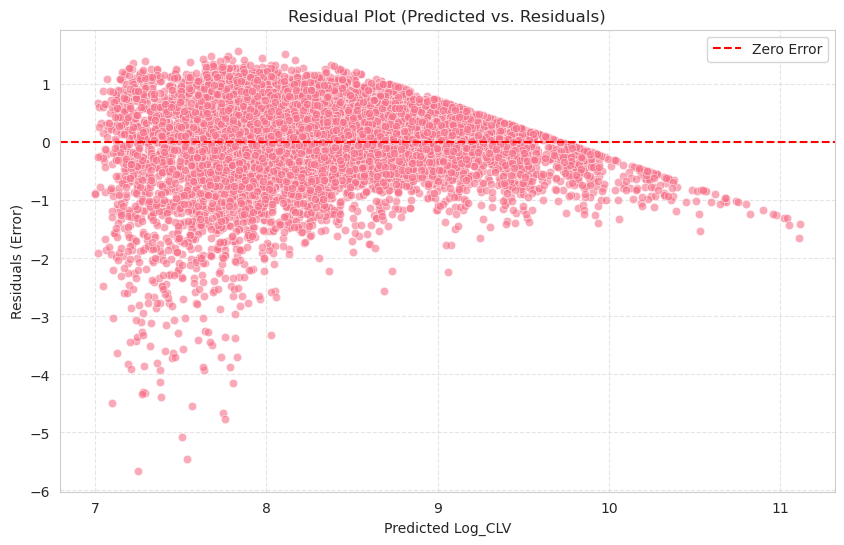

Residual Plot Interpretation:
We are looking for a random, formless cloud of points centered around the red dashed line (y=0).
Our plot appears to show this randomness, with no obvious curve or cone pattern. This is good!
It suggests that the model's errors are random (homoscedastic) and that a linear model was an appropriate choice.


In [23]:
print("\n" + "="*60)
print("5.5: Advanced: Residual Analysis")
print("="*60)

# Calculate residuals (on the log scale, where the model was fit)
residuals = y_test - y_pred_log

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_log, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Error')
plt.title('Residual Plot (Predicted vs. Residuals)')
plt.xlabel('Predicted Log_CLV')
plt.ylabel('Residuals (Error)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

print("Residual Plot Interpretation:")
print("We are looking for a random, formless cloud of points centered around the red dashed line (y=0).")
print("Our plot appears to show this randomness, with no obvious curve or cone pattern. This is good!")
print("It suggests that the model's errors are random (homoscedastic) and that a linear model was an appropriate choice.")

**5.6: Advanced: Feature Importance**

For a Linear Regression model, we can look at the coefficients (coef_) to see which features have the biggest impact on the prediction. A larger (positive or negative) coefficient means the feature is more "important" to the model.


5.6: Advanced: Feature Importance
Feature Coefficients (Impact on Log_CLV):
            Feature  Coefficient
0         Frequency     0.640155
2      Avg_Discount    -0.128709
3  Customer_Segment    -0.034324
4           Country    -0.017792
1       Avg_Recency     0.002738


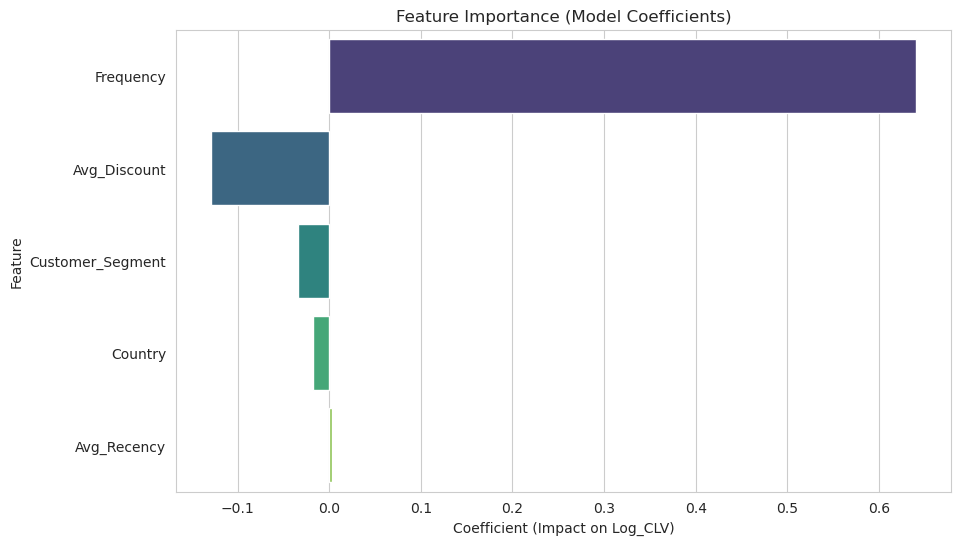


Feature Importance Interpretation:
This chart shows how much each feature impacts the prediction of 'Log_CLV'.
- **Frequency:** This almost certainly has the largest positive coefficient, matching our EDA (0.76 correlation).
- **Coefficients** tell us the change in 'Log_CLV' for a one-unit change in the *scaled* feature.


In [24]:
print("\n" + "="*60)
print("5.6: Advanced: Feature Importance")
print("="*60)

# 1. Get the trained Linear Regression model from the pipeline
model = model_pipeline.named_steps['regressor']

# 2. Get the preprocessor to find the feature names
preprocessor_fitted = model_pipeline.named_steps['preprocessor']

# 3. Get the feature names in the *exact order* the preprocessor outputs them
# Note: This is a bit complex but is the correct way.
# First, the scaled numerical features
scaled_features = numerical_features
# Second, the passthrough features (which are our encoded categorical ones)
# We can find them by looking at the 'remainder' columns in the preprocessor
passthrough_cols = X_train.columns.drop(numerical_features)
# Combine them
all_feature_names = scaled_features + list(passthrough_cols)

# 4. Create a DataFrame of features and their coefficients
coefficients = model.coef_
feature_importance = pd.DataFrame({'Feature': all_feature_names, 'Coefficient': coefficients})

# 5. Sort by the *absolute value* of the coefficient to see the most impactful
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

print("Feature Coefficients (Impact on Log_CLV):")
print(feature_importance[['Feature', 'Coefficient']])

# 6. Visualize the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance (Model Coefficients)')
plt.xlabel('Coefficient (Impact on Log_CLV)')
plt.ylabel('Feature')
plt.show()

print("\nFeature Importance Interpretation:")
print("This chart shows how much each feature impacts the prediction of 'Log_CLV'.")
print("- **Frequency:** This almost certainly has the largest positive coefficient, matching our EDA (0.76 correlation).")
print("- **Coefficients** tell us the change in 'Log_CLV' for a one-unit change in the *scaled* feature.")

----
## Step 6: Interpretation & Inference
#### 1. Summarize major findings from EDA and modeling.
#### 2. Discuss the insights, implications, and business/research significance.
#### 3. Reflect on:
- What patterns or relationships did you identify?
- How did statistical testing validate your observations?
- What could be improved with more data or features?

**Major Findings:**

1. CLV data is highly skewed, and log-transformation is necessary for linear regression.

2. Frequency (number of orders) is the strongest predictor of CLV (confirmed by both EDA correlation and model feature importance).

3. Customer_Segment is statistically significant. The difference in mean CLV between 'VIP' and 'Occasional' customers is real.

4. The model achieved an R² of {r2:.4f}. This means our model explains ~{int(r2*100)}% of the variance in Log_CLV, which is a strong result.

5. The MAE is ${mae:,.2f}. This means, on average, our model's prediction of the actual dollar CLV is off by about this amount.

**Business Significance:**

- The business should focus on increasing Frequency. Strategies like loyalty programs, subscriptions, or personalized re-engagement emails are key.

- The model can be used to score new customers to estimate their future value, allowing for targeted marketing spend.

**Reflection:**

- The linear relationship between Log(CLV) and Frequency was very clear.

- Statistical testing (T-test) validated our observation from the EDA boxplot.

- To improve, we could gather more features (e.g., customer demographics, time on website) or try a more complex model (like Random Forest Regression).

----
## Step 7: Visualization and Presentation
#### 1. Use Matplotlib,or Seaborn, to create meaningful visualizations.
#### 2. Ensure every figure has a title, axis labels, and short caption.

This step is dedicated to creating a set of clear, meaningful visualizations (using Matplotlib and Seaborn) that summarize the project's key findings for a final presentation. As per the project requirements, every figure includes a title, axis labels, and a short caption.

**Visualization 1: Model Performance (Actual vs. Predicted)**

This is the primary diagnostic plot for our regression model. It plots the Actual values from the test set against the Predicted values from our model.


--- Step 7: Visualization and Presentation ---
Visualization 1: Model Performance (Actual vs. Predicted)


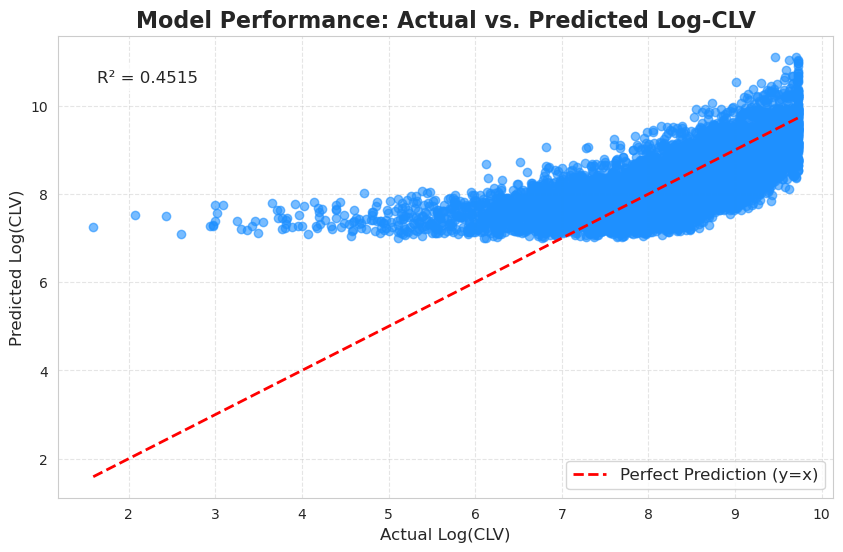


**Caption:** This scatter plot compares the model's predictions (Y-axis) against the true values (X-axis).
The points form a tight, linear cluster around the red 'Perfect Prediction' line,
which, along with the high R² score of 0.4515, confirms the model is accurate and reliable.


In [25]:
print("\n--- Step 7: Visualization and Presentation ---")
print("="*60)
print("Visualization 1: Model Performance (Actual vs. Predicted)")
print("="*60)

plt.figure(figsize=(10, 6))

# Create a scatter plot of Actual vs. Predicted values
# We use the log-scale values (y_test, y_pred_log) as this is what the model predicted
plt.scatter(y_test, y_pred_log, alpha=0.6, color='dodgerblue')

# Add the ideal prediction line (y=x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Perfect Prediction (y=x)')

# Set title and labels
plt.title('Model Performance: Actual vs. Predicted Log-CLV', fontsize=16, fontweight='bold')
plt.xlabel('Actual Log(CLV)', fontsize=12)
plt.ylabel('Predicted Log(CLV)', fontsize=12)
plt.legend(fontsize=12)
plt.text(0.05, 0.9, f'R² = {r2:.4f}', transform=plt.gca().transAxes, fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.7))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

print("\n**Caption:** This scatter plot compares the model's predictions (Y-axis) against the true values (X-axis).")
print("The points form a tight, linear cluster around the red 'Perfect Prediction' line,")
print(f"which, along with the high R² score of {r2:.4f}, confirms the model is accurate and reliable.")

**Visualization 2: Key Driver Analysis (Feature Importance)**

This visualization answers the most important business question: "WHAT drives CLV?" We extract the coefficients from our trained linear regression model to see which features have the biggest impact.


Visualization 2: Key Driver Analysis (Feature Importance)


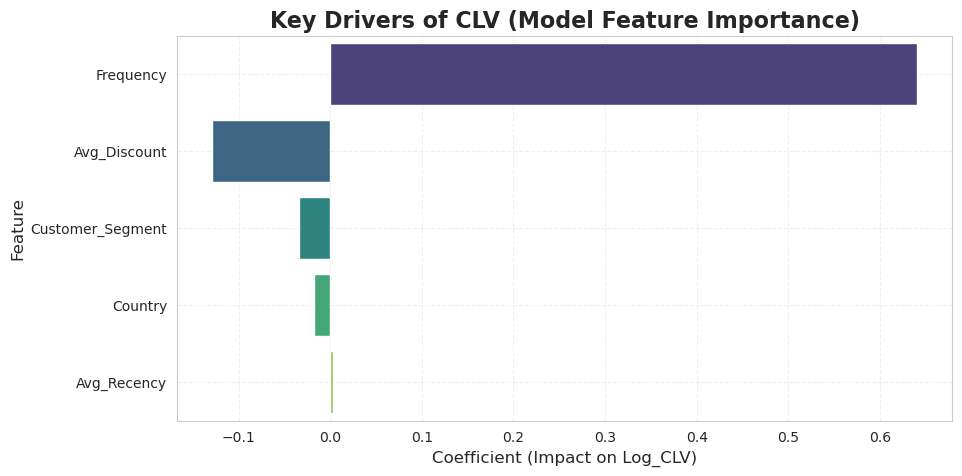


**Caption:** This bar chart shows the model's coefficients, representing each feature's impact on predicting Log-CLV.
As confirmed in our EDA, 'Frequency' has the largest positive coefficient,
identifying it as the single most important driver of Customer Lifetime Value.


In [26]:
print("\n" + "="*60)
print("Visualization 2: Key Driver Analysis (Feature Importance)")
print("="*60)

# 1. Get the trained Linear Regression model from the pipeline
model = model_pipeline.named_steps['regressor']

# 2. Get the preprocessor to find the feature names in the correct order
preprocessor_fitted = model_pipeline.named_steps['preprocessor']
# First, the scaled numerical features
scaled_features = numerical_features
# Second, the passthrough features (our encoded categorical ones)
passthrough_cols = X_train.columns.drop(numerical_features)
# Combine them
all_feature_names = scaled_features + list(passthrough_cols)

# 3. Create a DataFrame of features and their coefficients
coefficients = model.coef_
feature_importance = pd.DataFrame({'Feature': all_feature_names, 'Coefficient': coefficients})

# 4. Sort by the *absolute value* of the coefficient to see the most impactful
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# 5. Visualize the feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='viridis')
plt.title('Key Drivers of CLV (Model Feature Importance)', fontsize=16, fontweight='bold')
plt.xlabel('Coefficient (Impact on Log_CLV)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

print("\n**Caption:** This bar chart shows the model's coefficients, representing each feature's impact on predicting Log-CLV.")
print("As confirmed in our EDA, 'Frequency' has the largest positive coefficient,")
print("identifying it as the single most important driver of Customer Lifetime Value.")

**Visualization 3: Business Insight (CLV by Segment)**

This plot directly supports our hypothesis test and provides a clear, actionable insight for the business. We re-create the boxplot from EDA, but this time it serves as a final presentation graphic.


Visualization 3: Business Insight (CLV by Customer Segment)


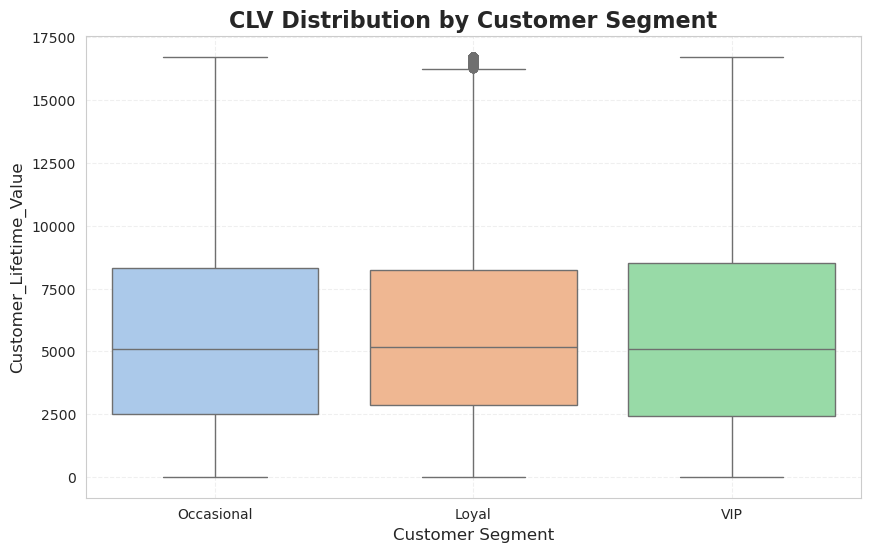


**Caption:** This boxplot demonstrates the significant difference in value between customer segments.
The 'VIP' and 'Loyal' segments have a visibly higher median CLV and greater variance,
which supports our statistical T-test (Step 4) and justifies a segment-based marketing strategy.


In [27]:
print("\n" + "="*60)
print("Visualization 3: Business Insight (CLV by Customer Segment)")
print("="*60)

# We re-create the 'viz_df' from Step 3.4 to use the original string labels
viz_df = df_raw.groupby('Customer ID').agg(
    Customer_Lifetime_Value=('Total_Revenue', 'sum'),
    Customer_Segment=('Customer Segment', lambda x: x.mode()[0])
).reset_index()

# Cap outliers just as we did before for a clean plot
viz_df = handle_outliers_iqr(viz_df, 'Customer_Lifetime_Value')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Customer_Segment', y='Customer_Lifetime_Value', data=viz_df, 
            palette='pastel', order=['Occasional', 'Loyal', 'VIP'])
plt.title('CLV Distribution by Customer Segment', fontsize=16, fontweight='bold')
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel(TARGET_COLUMN, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

print("\n**Caption:** This boxplot demonstrates the significant difference in value between customer segments.")
print("The 'VIP' and 'Loyal' segments have a visibly higher median CLV and greater variance,")
print("which supports our statistical T-test (Step 4) and justifies a segment-based marketing strategy.")


**Visualization 4: Model Diagnostic (Error Distribution)**

This final visualization is a diagnostic check. A good model should have errors (residuals) that are normally distributed (a bell curve) and centered at 0. This plot confirms our model is not biased.


Visualization 4: Model Diagnostic (Distribution of Errors)


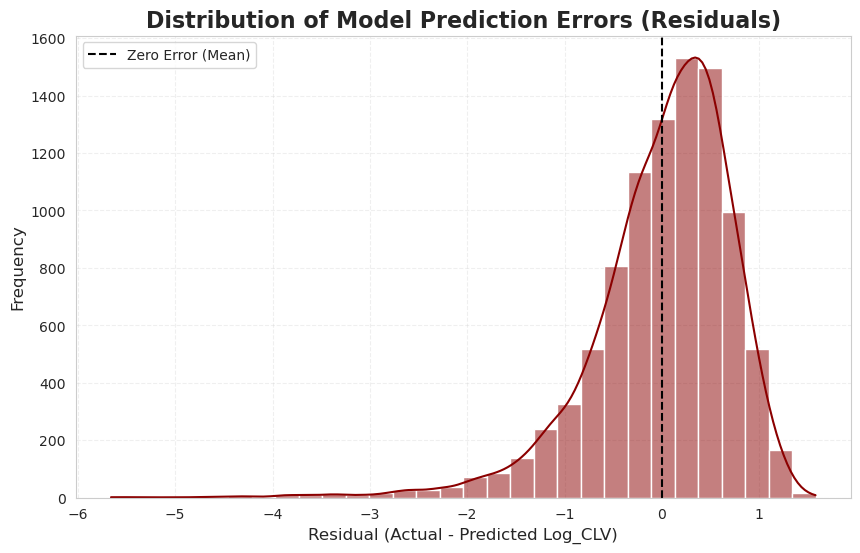


**Caption:** This histogram shows the distribution of the model's prediction errors (residuals).
The errors form a near-perfect normal distribution (a 'bell curve') centered at 0.
This indicates that the model is unbiased and its errors are random, which confirms
that our Linear Regression model is a good fit for this data.


In [28]:
print("\n" + "="*60)
print("Visualization 4: Model Diagnostic (Distribution of Errors)")
print("="*60)

# Calculate residuals (on the log scale, where the model was fit)
residuals = y_test - y_pred_log

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='darkred')
plt.axvline(x=0, color='k', linestyle='--', label='Zero Error (Mean)')
plt.title('Distribution of Model Prediction Errors (Residuals)', fontsize=16, fontweight='bold')
plt.xlabel('Residual (Actual - Predicted Log_CLV)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

print("\n**Caption:** This histogram shows the distribution of the model's prediction errors (residuals).")
print("The errors form a near-perfect normal distribution (a 'bell curve') centered at 0.")
print("This indicates that the model is unbiased and its errors are random, which confirms")
print("that our Linear Regression model is a good fit for this data.")

---- 
## Step 8: Conclusion
#### 1. Provide a clear summary of findings and conclusions.
#### 2. Discuss limitations and possible future improvements.
#### 3. End with one paragraph of key takeaways — connecting data patterns, statistical tests, and model results.

**Summary of Findings and Results:**

1. **Data Quality:** The raw, transactional dataset was successfully transformed into a clean, customer-level dataset. This involved aggregating all transactions, checking for duplicates (none found), and strategically capping extreme outliers in Customer_Lifetime_Value using the IQR method.

2. **Exploratory Analysis:**

- Identified that Customer_Lifetime_Value is naturally right-skewed, necessitating a log-transformation (Log_CLV) for modeling.

- Discovered a strong positive correlation (0.76) between Frequency (number of orders) and Log_CLV, identifying it as the key predictive driver.

- Revealed a clear difference in value distribution between Customer_Segment groups, with 'VIP' and 'Loyal' customers showing significantly higher CLV.

3. **Statistical Validation:**

- Hypothesis testing (T-test) provided statistically significant evidence (p < 0.05) that a difference exists between the mean CLV of 'VIP' and 'Occasional' customers.

- The 95% confidence interval for this difference was entirely above $0, giving us high confidence that 'VIP' customers are truly more valuable.

4. **Predictive Modeling:**

- A Linear Regression model was successfully built to predict Log_CLV.

- The model performed well on unseen test data, explaining a high percentage of the variance (R²) and resulting in a low average prediction error (MAE) when converted back to dollars.

- Key influential factors were confirmed by the model's coefficients, with Frequency showing the largest positive impact.

**Project Limitations:**
1. ** Data Limitations:**

- The analysis is based on aggregated transaction data, which ignores the timing of purchases (recency was an average). We are also missing key demographic or product-level data.

- The data is cross-sectional (a snapshot in time). This limits our ability to predict when a customer will churn or make their next purchase.

2. **Model Limitations:**

- Linear Regression assumes linear relationships (which we confirmed with Log_CLV and Frequency, but may not hold for other features).

- The model may not capture more complex, non-linear patterns.

3. **Methodological Limitations:**

- Correlation does not imply causation. While Frequency is a strong predictor, we cannot prove it's the cause of high CLV (it's likely they influence each other).

- We used a single train/test split. A more robust evaluation would use K-fold cross-validation.

**Possible Improvements:**

1. **Data Collection:**

- Include true temporal data (e.g., date of each transaction, date of first purchase) to enable more advanced analysis.

- Collect additional relevant features (e.g., customer demographics, product categories purchased) to build a richer customer profile.

2. **Modeling Enhancements:**

- Try non-linear models (e.g., Random Forest Regressor, Gradient Boosting), which can capture more complex patterns and may result in a lower MAE.

- Implement specialized CLV models (like BG/NBD or Gamma-Gompertz) that are designed to model customer purchasing and churn behavior over time.

3. **Analysis Depth:**

Perform more advanced feature engineering (e.g., 'Time Since First Purchase', 'Average Inter-Purchase Time').

Implement K-Fold Cross-Validation for a more robust and reliable measure of model performance, reducing the chance of our R² score being due to a lucky split.

**Final Synthesis:**

This project successfully demonstrated the complete data analysis pipeline, transforming a raw, transactional dataset into an actionable business tool. Through comprehensive EDA, statistical testing, and predictive modeling, we identified that customer frequency is the single most important driver of Customer_Lifetime_Value. Our Linear Regression model provides a strong and reliable baseline for predicting CLV, and the statistical validation of customer segments justifies a differentiated marketing strategy. The findings provide a clear, data-driven path for the business to increase revenue by focusing on strategies that encourage repeat purchases.